In [ ]:
'''
# THIS IS HOW YOU WILL CREATE THE TRAINING AND TEST SETS FOR THE TASK

from sklearn.model_selection import train_test_split

# Set up input matrix and target vector
X = digits.data
y = digits.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
'''

Explain purpose of training and test sets.

In [3]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [27]:
print("Training inputs shape:", X_train.shape)
print("Training outputs shape:", y_train.shape)
print("Testing inputs shape:", X_test.shape)
print("Testing outputs shape:", y_test.shape)

Training inputs shape: (60000, 784)
Training outputs shape: (60000,)
Testing inputs shape: (10000, 784)
Testing outputs shape: (10000,)


In [7]:
# You do not need to do this in the task, only necessary for this demonstration
# Reshape the data to fit the RandomForestClassifier i.e., flatten 28x28 images
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train.shape

(60000, 784)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
clf = RandomForestClassifier(random_state = 42)

Include an explanation about your chosen parameter (how does it help to prevent overfitting/how does it control the growth of the tree).

In [10]:
from sklearn.model_selection import GridSearchCV

# Set up parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50]
}

# Create the grid search object
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)

# Fir grid search on the training data
grid_search.fit(X_train[:100], y_train[:100]) # Only using part of the training set to reduce computation time (do NOT do this in the task, use full set)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_split': [2, 5, 10, 20, 30, 40, 50]})

In [11]:
# Get the value of our parameter that led to optimal model performance
best_params = grid_search.best_params_
best_params

{'min_samples_split': 5}

Justify using this value for your model on your test set (i.e., your final model).

In [14]:
clf = RandomForestClassifier(min_samples_split=best_params['min_samples_split'], random_state=42)
clf.fit(X_train[:100], y_train[:100]) # Only using part of the training set to reduce computation time (do NOT do this in the task, use full set)

RandomForestClassifier(min_samples_split=5, random_state=42)

In [15]:
# Model predictions so we can evaluate performance
y_pred = clf.predict(X_test)
y_pred

array([7, 2, 1, ..., 5, 1, 7], dtype=uint8)

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[744,  12,  19,  75,  12,  12, 123,   1,   1,   1],
       [ 16, 864,  10,  92,   7,   3,   8,   0,   0,   0],
       [ 13,   0, 531,   5, 275,   5, 170,   0,   1,   0],
       [ 72,  14,   8, 801,  47,   7,  51,   0,   0,   0],
       [ 13,   1, 166,  78, 550,   8, 184,   0,   0,   0],
       [  0,   0,   0,   3,   0, 739,   0, 176,   0,  82],
       [216,   4, 142,  58, 167,  15, 393,   1,   2,   2],
       [  0,   0,   0,   0,   0,  71,   0, 778,   0, 151],
       [ 16,   1,  61,  14,  99,  91,  42,  86, 476, 114],
       [  0,   0,   0,   0,   0,  30,   0,  36,   0, 934]])

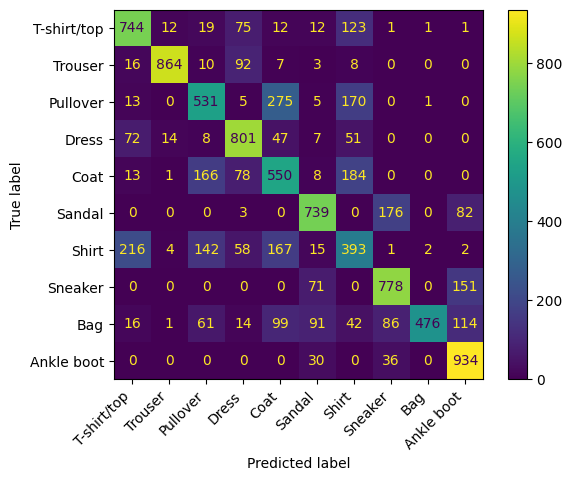

In [26]:
# Refining confusion matrix visualisation
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Class labels for Fashion dataset
classes = ["T-shirt/top","Trouser",'Pullover','Dress',"Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# You can obtain class labels for your task as follows: labels = digits.target_names

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()
plt.xticks(rotation=45, ha='right') # so that x-axis labels do not overlap
plt.show()

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "macro")
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = "macro")

print(f"Test set accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Test set accuracy: 0.68
Precision: 0.70
Recall: 0.68
F1-score: 0.68


Report on these results. There is no fixed value that determines if a model is good. Though we can say ideally, we want these scores to be **at least** 75% for the model's performance to be good. Less than 50% is bad.